<a href="https://colab.research.google.com/github/SebastianLarssonDTU/02456-Reinforcement-Learning-Project/blob/before_framestacking/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIT : Procgen, Drive, Git

In [1]:
!pip install procgen

In [2]:
#Clone git
!git clone -b before_framestacking https://github.com/SebastianLarssonDTU/02456-Reinforcement-Learning-Project.git "my_project"

fatal: destination path 'my_project' already exists and is not an empty directory.


In [3]:
#update git
%cd /content/my_project
! git pull

/content/my_project
Already up to date.


In [4]:
import datatools as tools
from datatools import DATA_PATH, MODEL_PATH
#Mount drive
tools.mount_drive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [5]:
#Import all custom files
import baseline
import datatools as tools
import hyperparameters as h
import model
import my_util
import policy
import ppo
import utils

#other imports
import torch

#import specific methods
from baseline import set_hyperparameters
from ppo import PPO
from experiments import run_experiment, print_list_of_experiments


In [6]:
print_list_of_experiments()

***** Experiment 0 *****
Description:    Baseline inspired by PPO article
***** Experiment 1 *****
Description:    Baseline inspired by Procgen article
***** Experiment 2 *****
Description:    Modified PPO baseline with value clipping enabled
***** Experiment 3 *****
Description:    Modified PPO baseline with value clipping enabled and learning rate given by par variable
***** Experiment 4 *****
Description:    Modified PPO baseline with value clipping enabled and reward penalty on death (1 as default)
***** Experiment 5 *****
Description:    Baseline inspired by IMPALA paper (No value clipping)
***** Experiment 6 *****
Description:    Inspired by IMPALA paper (With value clipping)
***** Experiment 7 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping)
***** Experiment 8 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping) and added death penalty


# Create INDEX



In [7]:
INDEX = tools.create_index_table_from_txt_files()
INDEX

,total_steps,num_envs,num_levels,num_steps,num_epochs,batch_size,eps,grad_eps,value_coef,entropy_coef,lr,gamma,lmbda,version,time_limit,value_clipping,death_penalty,file_name,eval,eval_cycle,Time spent (in seconds),Steps taken,penalty,save_interval,step_start,nstack,Time spent,Last Mean Reward
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment0,43200,False,False,Experiment0_Run_26Nov_15h21m41s,True,16,18858.62,8003584,NaN,NaN,NaN,NaN,5:14:18,20.34375
Value,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,0.999,0.95,Experiment1,43200,False,False,Experiment1_Run_26Nov_15h22m38s,True,16,19818.86,8003584,NaN,NaN,NaN,NaN,5:30:18,19.53125
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment2,43200,True,False,Experiment2_Run_27Nov_11h05m48s,True,16,20480.86,8003584,NaN,NaN,NaN,NaN,5:41:20,28.15625
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment4,43200,True,True,Experiment4_Run_27Nov_11h07m20s,True,16,20819.16,8003584,NaN,NaN,NaN,NaN,5:46:59,25.8125
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.0025,0.99,0.95,Experiment3,43200,True,False,Experiment3_Run_27Nov_18h03m39s,True,16,NaN,4136960,NaN,NaN,NaN,NaN,NaN,23.0
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment4,43200,True,True,Experiment4_Run_27Nov_18h11m00s,True,16,NaN,7077888,3,NaN,NaN,NaN,NaN,24.5
Value,8000000.0,32,10,256,3,32,0.2,0.5,0.5,0.01,0.0006,0.99,0.95,Experiment5,43200,False,False,Experiment5_Run_27Nov_16h37m42s,True,16,32130.90,8003584,NaN,NaN,NaN,NaN,8:55:30,16.28125
Value,8000000.0,32,10,256,3,32,0.2,0.5,0.5,0.01,0.0006,0.99,0.95,Experiment6,43200,True,False,Experiment6_Run_28Nov_12h09m43s,True,16,34241.34,8003584,1,NaN,NaN,NaN,9:30:41,24.15625
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,2.5e-05,0.99,0.95,Experiment3,43200,True,False,Experiment3_Run_29Nov_16h30m27s,True,16,NaN,6979584,1,NaN,NaN,NaN,NaN,22.03125
Value,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0006,0.99,0.95,Experiment7,43200,True,False,Experiment7_Run_30Nov_14h45m32s,True,16,27210.47,8003584,1,NaN,NaN,NaN,7:33:30,29.71875


In [8]:
import glob

file_names = [x.strip() for x in INDEX['file_name']]
n = len(file_names)
# for i in range(n):
#   file_names.append(INDEX['file_name'][-1-i].strip())

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot_training_graphs(file_names, legend = None):
  base = 32*256
  df = pd.DataFrame(columns=file_names)
  
  # df['Step'] = pd.read_csv(DATA_PATH + INDEX["file_name"][0].strip()+".csv")["Step"]  #This only works as long as they all have the same steps!
  
  for file_name in file_names:
    df[file_name] = pd.read_csv(DATA_PATH + file_name+".csv")[" Mean reward"]
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')

  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  if legend is not None:
    plt.legend(labels=[legend[x] for x in file_names])
  plt.title("Training")

def plot_eval_graphs(file_names, legend = None):
  base = 32*256*16
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    temp = pd.read_csv(DATA_PATH + file_name+"_EVAL.csv")
    df[file_name] = temp["avg"]
  
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')
  
  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  if legend is not None:
    plt.legend(labels=[legend[x] for x in file_names])
  plt.title("Eval")
  # return df

In [10]:
for i in range(len(file_names)):
  print("[{:2d}]: {}".format(i, file_names[i]))

[ 0]: Experiment0_Run_26Nov_15h21m41s
[ 1]: Experiment1_Run_26Nov_15h22m38s
[ 2]: Experiment2_Run_27Nov_11h05m48s
[ 3]: Experiment4_Run_27Nov_11h07m20s
[ 4]: Experiment3_Run_27Nov_18h03m39s
[ 5]: Experiment4_Run_27Nov_18h11m00s
[ 6]: Experiment5_Run_27Nov_16h37m42s
[ 7]: Experiment6_Run_28Nov_12h09m43s
[ 8]: Experiment3_Run_29Nov_16h30m27s
[ 9]: Experiment7_Run_30Nov_14h45m32s
[10]: Experiment8_Run_30Nov_22h21m06s
[11]: Experiment7_100levels_Run_02Dec_09h29m48s
[12]: Experiment8_50levels_Run_02Dec_17h18m34s
[13]: Experiment8_10levels_Run_02Dec_09h48m26s
[14]: Experiment2_100levels_Run_03Dec_10h48m24s
[15]: Experiment8_50levels_Run_03Dec_14h53m09s
[16]: Experiment8_10levels_Run_03Dec_11h04m34s
[17]: Experiment8_50levels_Run_04Dec_06h17m22s
[18]: Experiment4_50levels_Run_04Dec_08h02m21s
[19]: Experiment2_50levels_Run_04Dec_18h10m32s
[20]: Experiment7_50levels_Run_04Dec_18h12m45s
[21]: Experiment8_50levels_Run_05Dec_08h34m02s
[22]: Experiment2_50levels_Run_04Dec_18h10m32s_loaded_05Dec_09h

# Creating legend

In [11]:
legend = {}

In [26]:
""" 10 levels """
#Procgen (0)
procgen = "Experiment1_Run_26Nov_15h22m38s"
legend[procgen] = "procgen"


#PPO (1,2,3)
ppo_base = "Experiment0_Run_26Nov_15h21m41s"
legend[ppo_base] = "ppo_base"

ppo_value_clipped = "Experiment2_Run_27Nov_11h05m48s"
legend[ppo_value_clipped] = "ppo_value_clipped"

#PPO w. death penalty (4)
ppo_death1 = "Experiment4_Run_27Nov_11h07m20s"
legend[ppo_death1] = "ppo_death1"

ppo_death3 = "Experiment4_Run_27Nov_18h11m00s"
legend[ppo_death3] = "ppo_death3"

#Impala (5,6,7)
impala_baseline = "Experiment5_Run_27Nov_16h37m42s"
legend[impala_baseline] = "impala_baseline"

impala_value_clipped = "Experiment6_Run_28Nov_12h09m43s"
legend[impala_value_clipped] = "impala_value_clipped"

impala_modified = "Experiment7_Run_30Nov_14h45m32s"
legend[impala_modified] ="impala_modified"

#Impala w. death penalty (8)
impala_death1 = "Experiment8_Run_30Nov_22h21m06s"
legend[impala_death1] ="impala_death1"

impala_death3 = "Experiment8_10levels_Run_02Dec_09h48m26s"
legend[impala_death3] ="impala_death3"

impala_death5 = "Experiment8_10levels_Run_07Dec_18h17m17s"
legend[impala_death5] ="impala_death5"

impala_death7 = "Experiment8_10levels_Run_03Dec_11h04m34s"
legend[impala_death7] ="impala_death7"


In [13]:
""" 50 levels """
#PPO (1,2,3)
ppo_value_clipped_50 = "Experiment2_50levels_Run_04Dec_18h10m32s_combined"
legend[ppo_value_clipped_50] = "ppo_value_clipped_50"

#PPO w. death penalty (4)
ppo_death5_50 = "Experiment4_50levels_Run_04Dec_08h02m21s"
legend[ppo_death5_50] = "ppo_death5_50"

#Impala (5,6,7)
impala_modified_50 = "Experiment7_50levels_Run_04Dec_18h12m45s_combined"
legend[impala_modified_50] ="impala_modified_50"

#Impala w. death penalty (8)
impala_death1_50 = "Experiment8_50levels_Run_02Dec_17h18m34s"
legend[impala_death1_50] ="impala_death1_50"

impala_death5_50 = "Experiment8_50levels_Run_03Dec_14h53m09s"
legend[impala_death5_50] ="impala_death5_50"

impala_death10_50 = "Experiment8_50levels_Run_04Dec_06h17m22s"
legend[impala_death10_50] ="impala_death10_50"

impala_death20_50 = "Experiment8_50levels_Run_06Dec_12h06m47s"
legend[impala_death20_50] ="impala_death20_50"



In [14]:
""" 100 levels """
#PPO (1,2,3)
ppo_value_clipped_100 = "Experiment2_100levels_Run_03Dec_10h48m24s"
legend[ppo_value_clipped_100] = "ppo_value_clipped_100"


#PPO w. death penalty (4)

#Impala (5,6,7)
impala_modified_100 = "Experiment7_100levels_Run_02Dec_09h29m48s"
legend[impala_modified_100] ="impala_modified_100"

#Impala w. death penalty (8)



In [15]:
""" 200 levels """
#PPO (1,2,3)
ppo_value_clipped_200 = "Experiment2_200levels_Run_07Dec_13h49m13s_combined"
legend[ppo_value_clipped_200] = "ppo_value_clipped_200"


#PPO w. death penalty (4)

#Impala (5,6,7)
impala_modified_200 = "Experiment7_200levels_Run_06Dec_16h18m31s_combined"
legend[impala_modified_200] ="impala_modified_200"

#Impala w. death penalty (8)
impala_death5_200 = "Experiment8_200levels_Run_06Dec_16h17m59s_combined"
legend[impala_death5_200] ="impala_death5_200"


In [16]:
all_impalas = [impala_baseline, impala_value_clipped, impala_modified, impala_death1, impala_death3, impala_death5, impala_death7]

all_impala_modified = [impala_modified, impala_modified_50, impala_modified_100, impala_modified_200]

all_impala_death = [impala_death1, impala_death1_50, impala_death3, impala_death5_50, impala_death7, impala_death10_50, impala_death20_50, impala_death5_200, impala_death5]

all_ppos = [ppo_base, ppo_value_clipped, ppo_death1, ppo_death3]
all_ppo_value_clipped = [ppo_value_clipped, ppo_value_clipped_50, ppo_value_clipped_100, ppo_value_clipped_200]

all_10 = all_ppos + all_impalas + [procgen]
all_50 = [impala_modified_50, impala_death5_50, impala_death1_50, impala_death10_50, ppo_death5_50, ppo_value_clipped_50, impala_death20_50]
all_100 = [ppo_value_clipped_100, impala_modified_100]
all_200 =[impala_modified_200, impala_death5_200, ppo_value_clipped_200]


In [17]:
excluded=["Experiment7_50levels_Run_04Dec_18h12m45s",     #base for long run
          "Experiment2_50levels_Run_04Dec_18h10m32s"]     #base for long run

#which files are not in legend?
print("THe following files have not been added to the legend yet")
for file_name in file_names:
  if file_name not in legend:
    if "loaded" not in file_name and file_name not in excluded:
      print(file_name)
      ex = INDEX.iloc[file_names.index(file_name)]
      if "Experiment8" in file_name or "Experiment4" in file_name:
        print("\t ^death penalty" + str(ex['penalty'] +"^"))
      if "Experiment3" in file_name:
        print("\t ^learning rate" + str(ex['lr'] +"^"))

THe following files have not been added to the legend yet
Experiment3_Run_27Nov_18h03m39s
	 ^learning rate 0.0025^
Experiment3_Run_29Nov_16h30m27s
	 ^learning rate 2.5e-05^
Experiment8_50levels_Run_05Dec_08h34m02s
	 ^death penalty 5^
Experiment8_200levels_Run_06Dec_16h17m59s
	 ^death penalty 5^
Experiment7_200levels_Run_06Dec_16h18m31s
Experiment2_200levels_Run_07Dec_13h49m13s
Experiment8_10levels_Run_07Dec_19h33m37s
	 ^death penalty 5^
Experiment8_50levels_Run_07Dec_20h59m00s
	 ^death penalty 5^
Experiment8_50levels_Run_07Dec_23h32m28s
	 ^death penalty 5^


# GRAPHS

## All trained on 10 levels

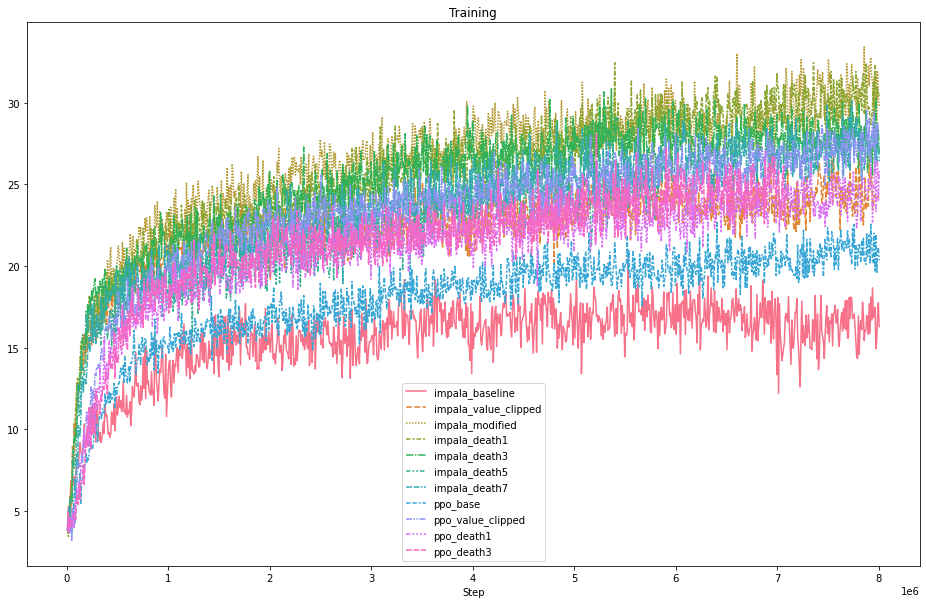

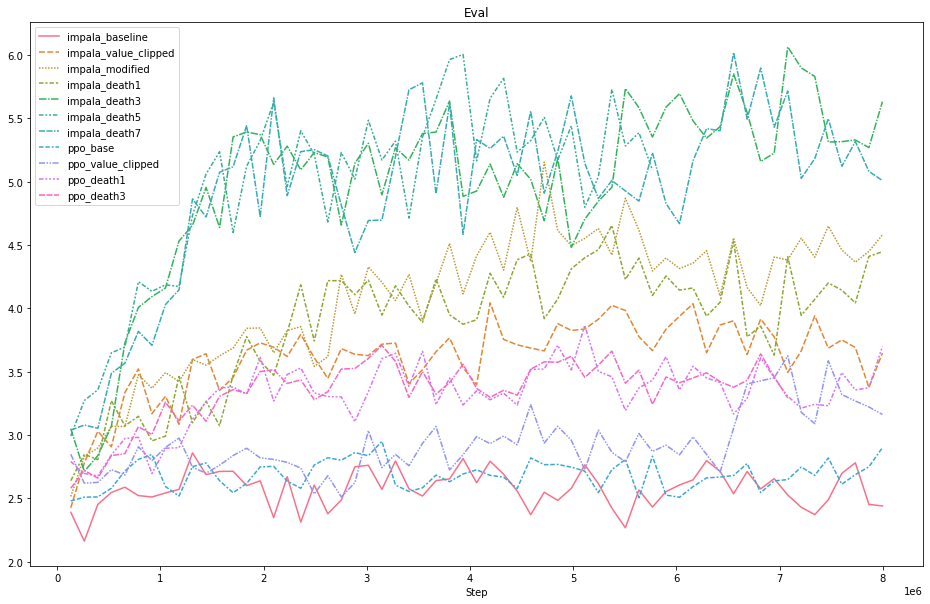

In [18]:
chosen_files = all_impalas + all_ppos
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All IMPALA modified

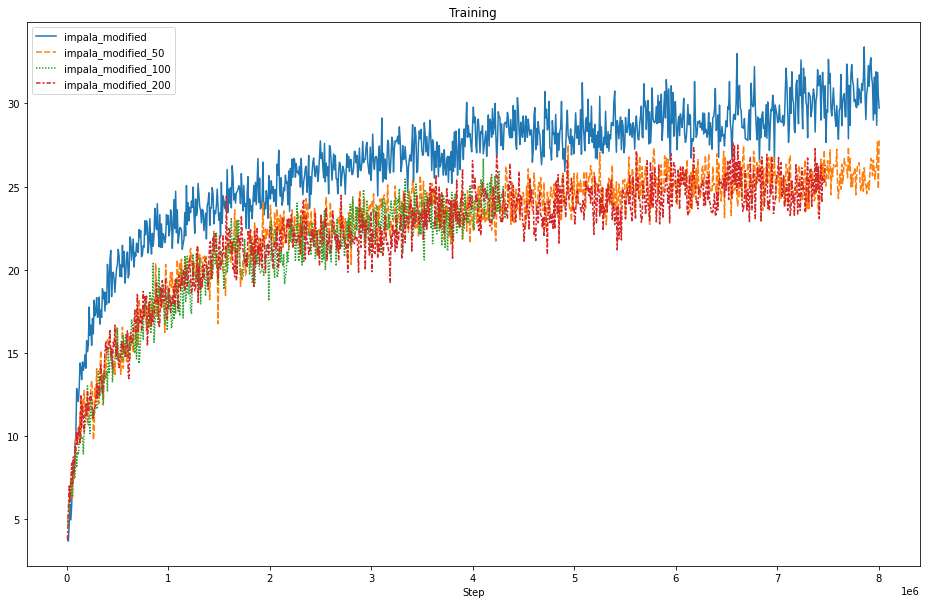

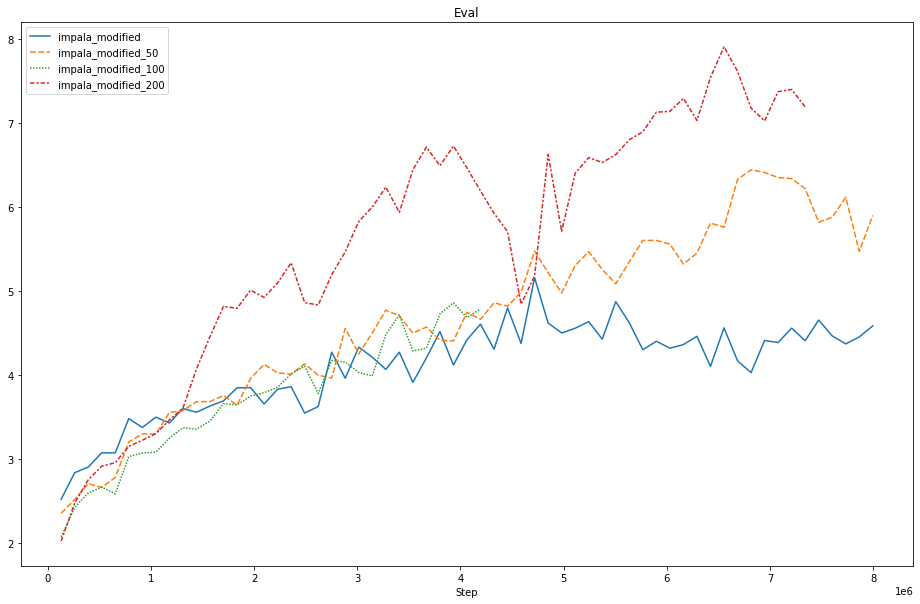

In [19]:
chosen_files = all_impala_modified
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All PPO value clipped 

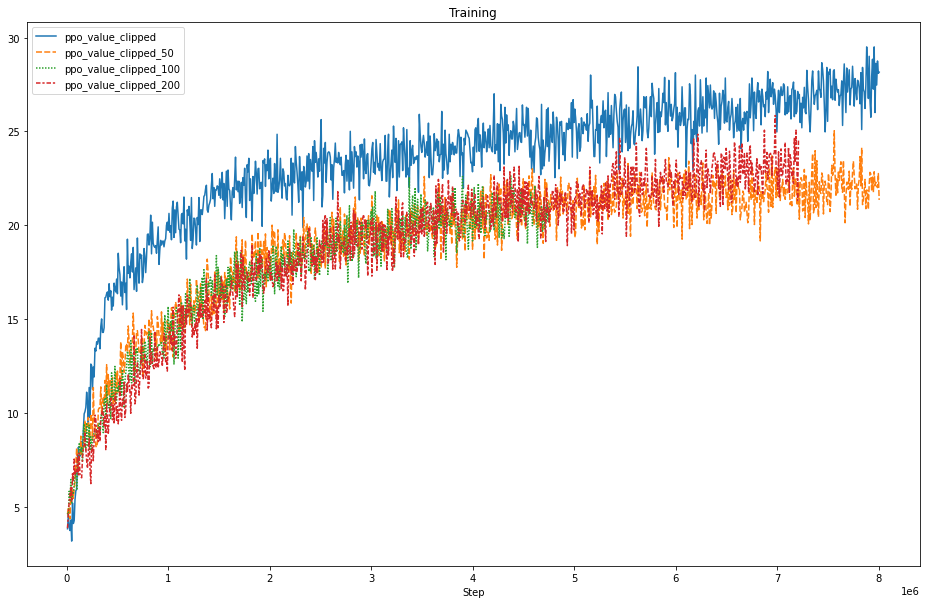

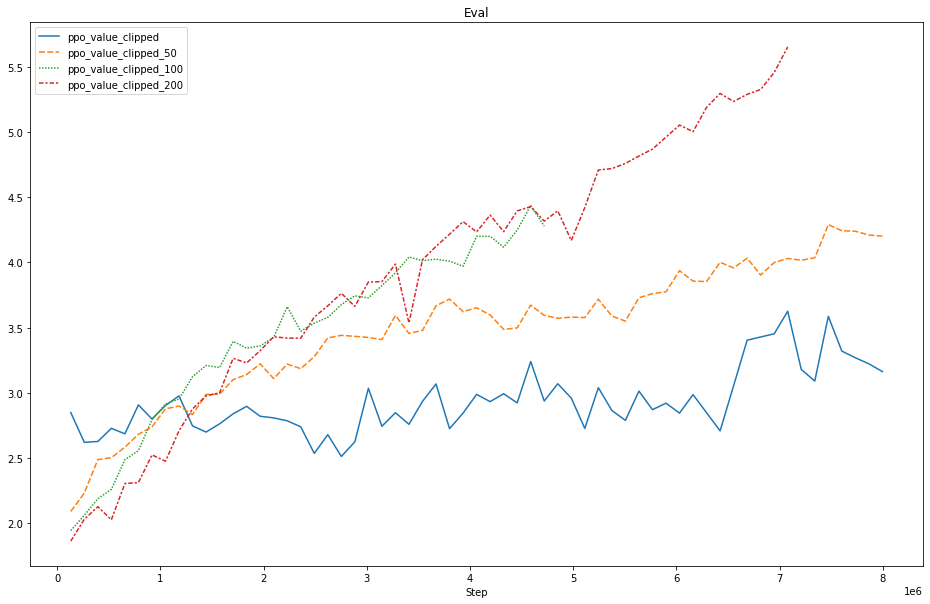

In [20]:
chosen_files = all_ppo_value_clipped
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All IMPALA with death penalty

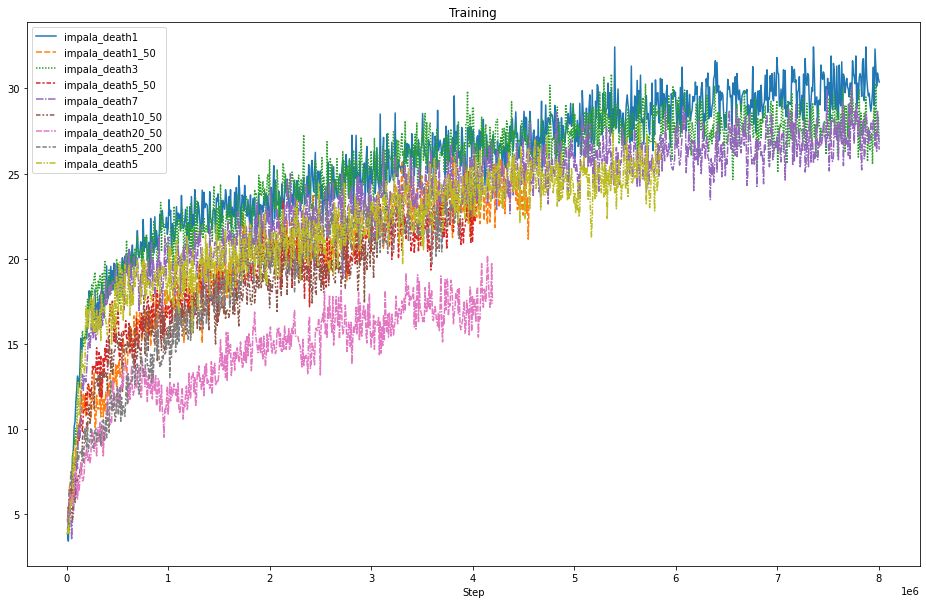

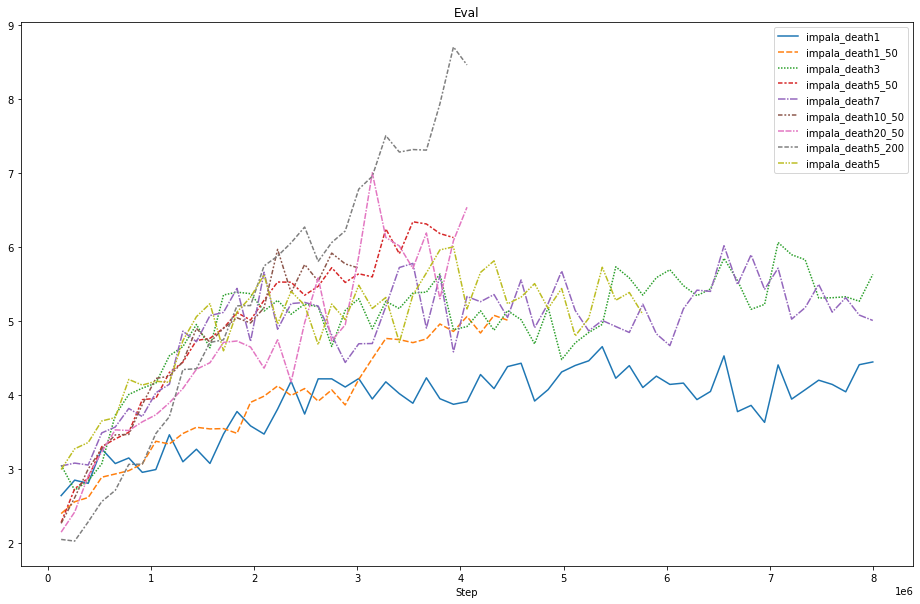

In [21]:
chosen_files = all_impala_death
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All trained on 50 levels

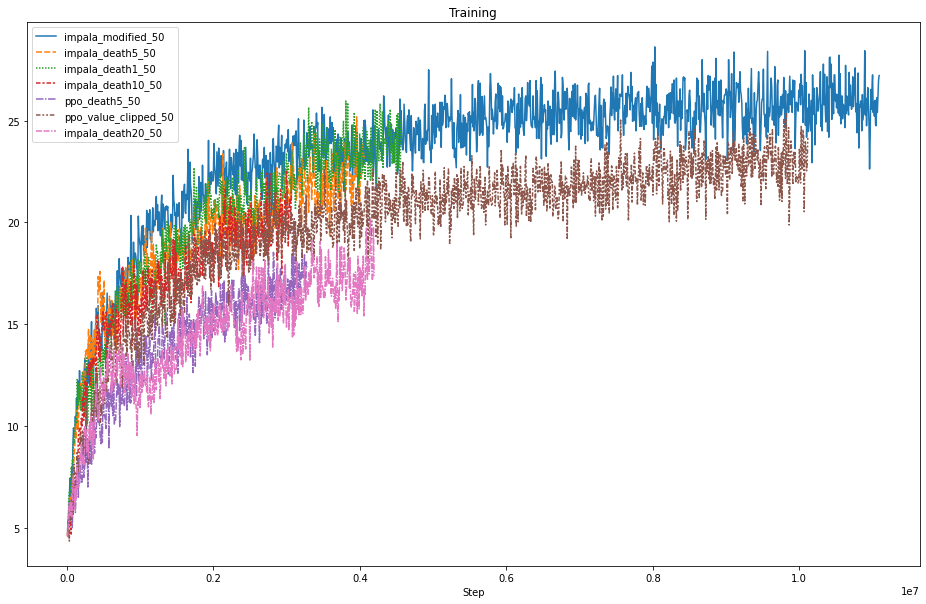

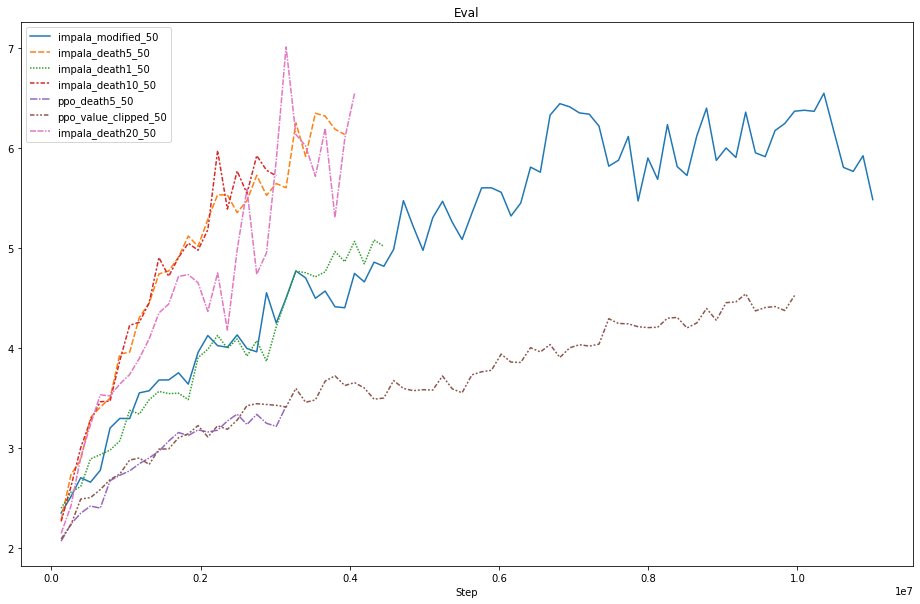

In [22]:
chosen_files = all_50
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## All trained on 100 levels

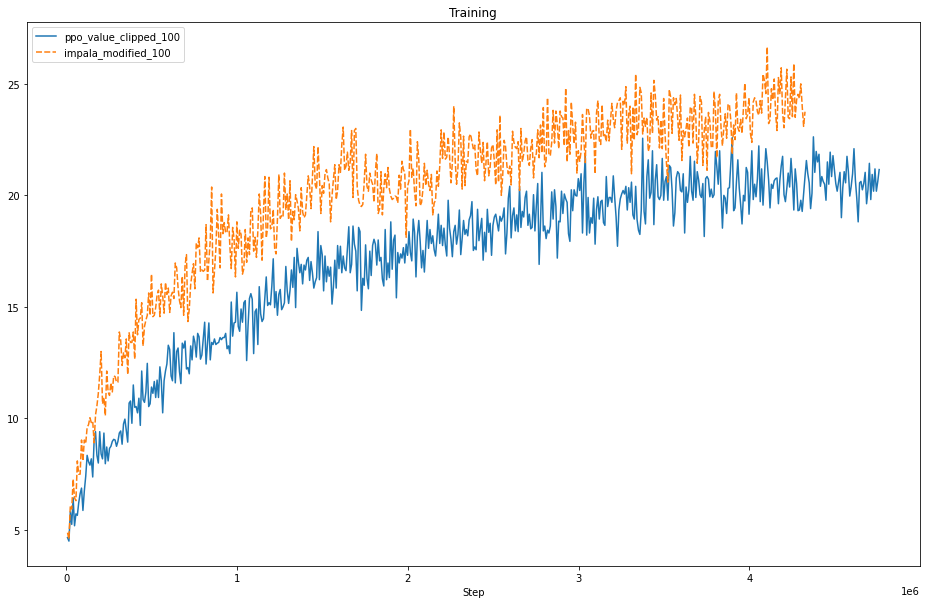

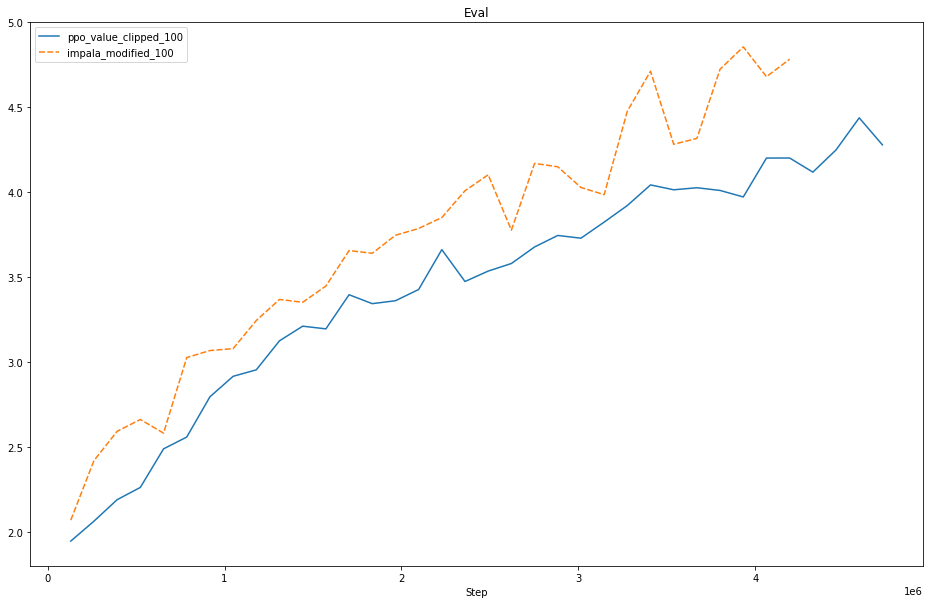

In [23]:
chosen_files = all_100
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## All trained on 200 levels

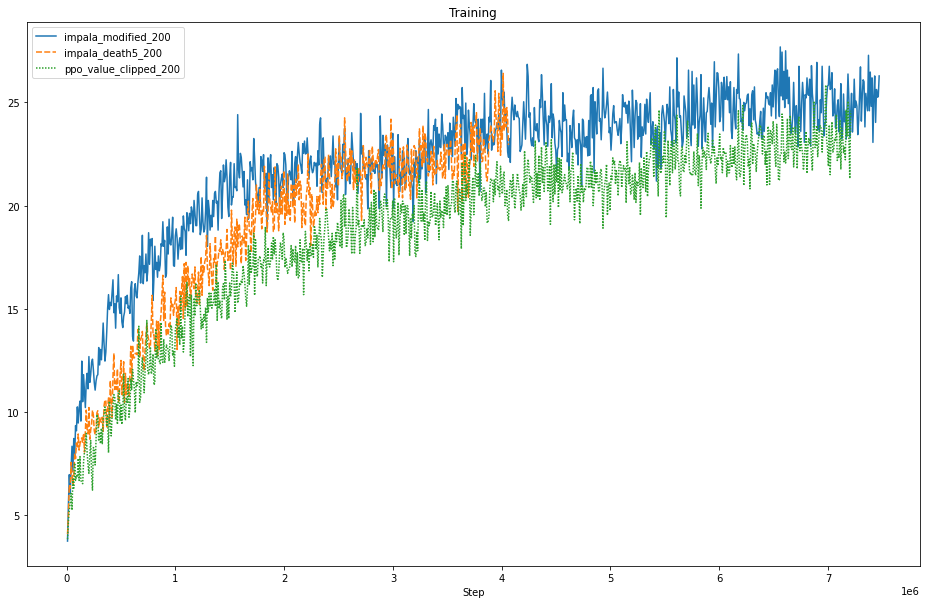

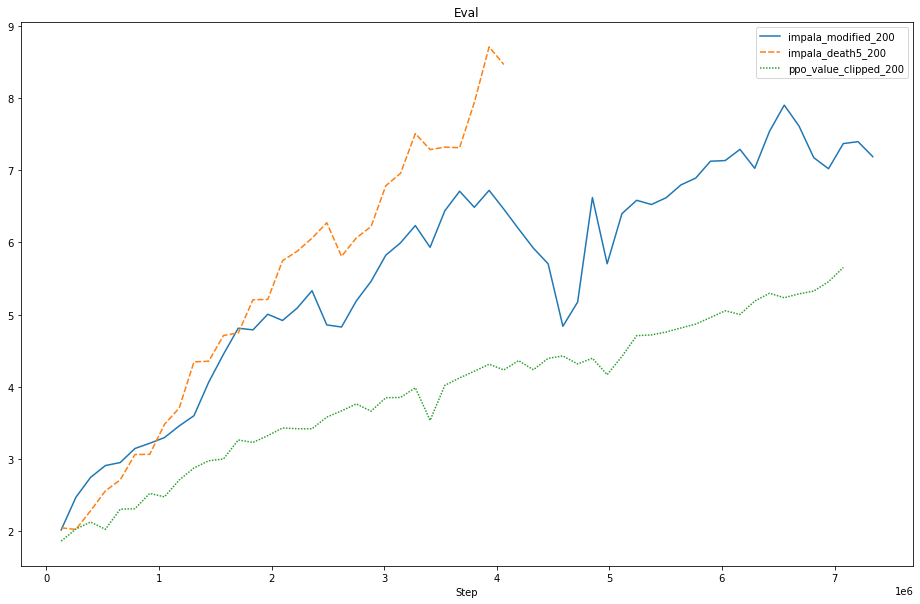

In [24]:
chosen_files = all_200
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## custom

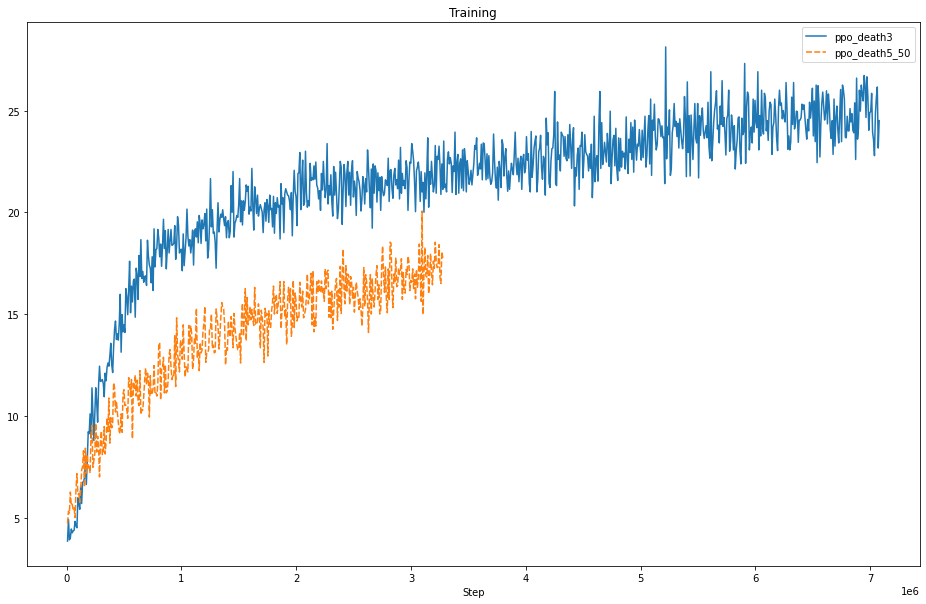

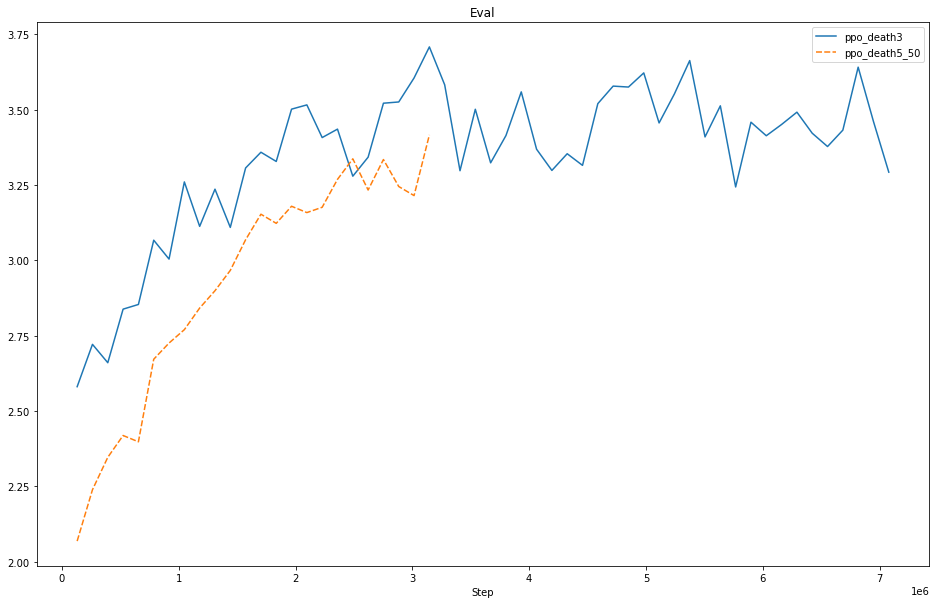

In [25]:
chosen_files = [ppo_death3, ppo_death5_50]
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


#TO DO

## Experiments
* impala death 20 50 levels

## Code to implement
* Continue training (save models ever 1 M steps, make sure we can load and continue training)
* Test models on levels it has been trained on


## Remarks
* The number of levels evaluated on is the same as the number trained on

